In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import argrelextrema

In [30]:
df = pd.read_csv('Data\\Dataset_1.csv', encoding='latin-1')

# Assuming the last column is your target variable (class)
X = df.iloc[:, 18:]

In [60]:
def ml_first_echo_detection(signal, sampling_rate, speed_of_sound):
    # ML first echo detection algorithm
    n_samples = len(signal)
    
    # Calculate the likelihood function
    likelihood = np.abs(np.fft.fft(signal))**2
    
    # Find peaks above a certain threshold
    threshold = np.max(likelihood) * 0.1  # Adjust the threshold as needed
    peaks = argrelextrema(likelihood, np.greater, order=5)[0]  # Find local maxima
    
    # Plot the likelihood function
    freq = np.fft.fftfreq(n_samples, d=1/sampling_rate)
    plt.plot(freq, likelihood)
    plt.scatter(freq[peaks], likelihood[peaks], color='red', label='Peaks')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Likelihood Function with Peaks')
    plt.legend()
    plt.grid(True)
    plt.show()


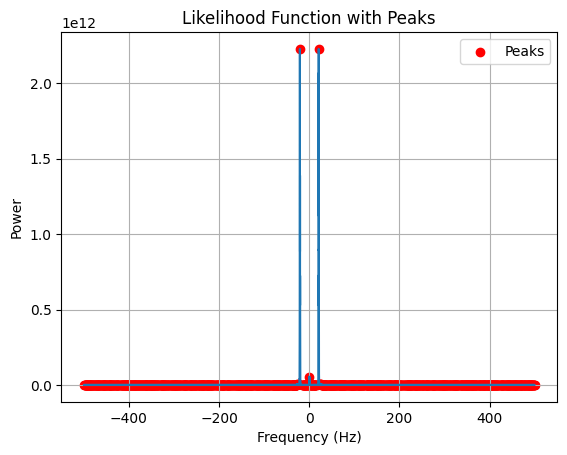

Estimated echo distance: None


In [61]:
# Example usage:
## signal = [18,	15,	263,	267,	260,	238,	215,	188,	158,	131,	96,	59,	15,	-32,	-80,	-120]  # Example signal data
signal = df.iloc[1, 18:]  # Example signal data
sampling_rate = 1000  # Example sampling rate
speed_of_sound = 343  # Example speed of sound in m/s
echo_distance = ml_first_echo_detection(signal, sampling_rate, speed_of_sound)
print("Estimated echo distance:", echo_distance)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def detect_first_echo(signal):
    # Calculate the autocorrelation of the signal
    autocorr = np.correlate(signal, signal, mode='full')
    
    # Find the peak in the autocorrelation function (excluding the first peak at lag 0)
    peak_index = np.argmax(autocorr[1:]) + 1
    
    # Find the maximum value in the autocorrelation function for the first peak
    max_value = autocorr[peak_index]
    
    return peak_index, max_value

Index of the first echo: 16365
Maximum value in the autocorrelation function for the first peak: 2798905232


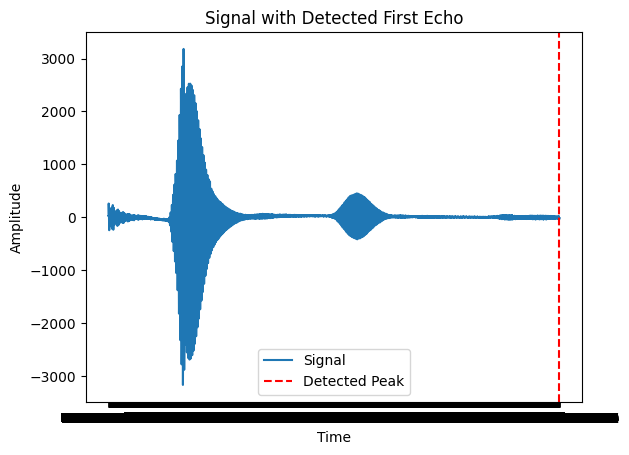

In [58]:
signal = df.iloc[1, 18:]  # Example signal data
peak_index, max_autocorr_value = detect_first_echo(signal)
print("Index of the first echo:", peak_index)
print("Maximum value in the autocorrelation function for the first peak:", max_autocorr_value)

# Plot the signal and the detected first echo
plt.plot(signal, label='Signal')
plt.axvline(x=peak_index, color='red', linestyle='--', label='Detected Peak')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with Detected First Echo')
plt.legend()
plt.show()

In [38]:
# Example usage:
sampling_rate = 1000  # Example sampling rate (samples per second)
speed_of_sound = 343  # Example speed of sound in air (in meters per second)

# Convert index of first echo to time
first_echo_time = max_autocorr_value / sampling_rate

# Calculate round-trip time (assuming ultrasound travels at the speed of sound)
round_trip_time = 2 * first_echo_time

# Calculate distance traveled by ultrasound
distance = round_trip_time * speed_of_sound

print("Distance from first echo:", distance, "meters")
print("Distance from first echo:", distance*100, "Centimeters")

Distance from first echo: 11226.39 meters
Distance from first echo: 1122639.0 Centimeters


Detected Index of the First Echo: 99


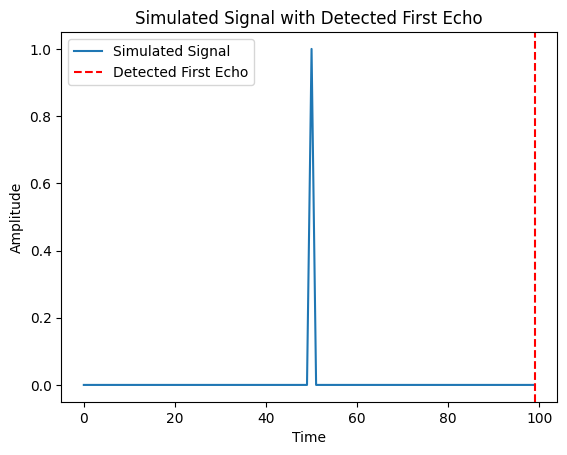

In [39]:
# Simulate a signal with a known first echo
known_first_echo_index = 50  # Example known index of the first echo
simulated_signal = np.zeros(100)
simulated_signal[known_first_echo_index] = 1  # Add a spike at the known index

# Detect the first echo in the simulated signal
detected_first_echo_index = detect_first_echo(simulated_signal)
print("Detected Index of the First Echo:", detected_first_echo_index)

# Plot the simulated signal and the detected first echo
plt.plot(simulated_signal, label='Simulated Signal')
plt.axvline(x=detected_first_echo_index, color='red', linestyle='--', label='Detected First Echo')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Simulated Signal with Detected First Echo')
plt.legend()
plt.show()


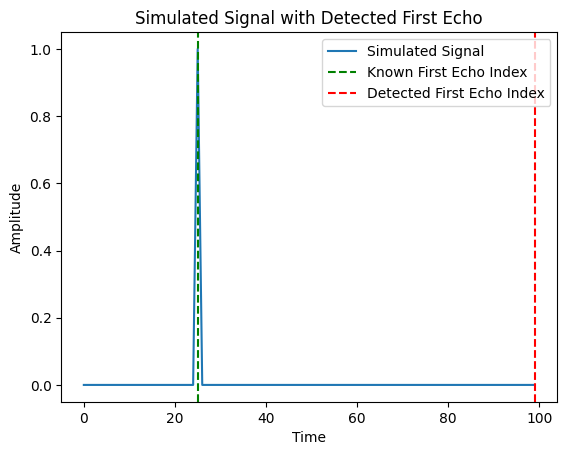

Detected First Echo Index: 99
Known First Echo Index: 25


In [55]:
# Function to detect the first echo in a signal
def detect_first_echo(signal):
    autocorr = np.correlate(signal, signal, mode='full')
    peak_index = np.where(autocorr[1:] == np.max(autocorr[1:]))[0][0] + 1
    return peak_index

# Simulate a signal with a known first echo
signal_length = 100
known_first_echo_index = 25  # Known index of the first echo
simulated_signal = np.zeros(signal_length)
simulated_signal[known_first_echo_index] = 1  # Add a spike at the known index

# Detect the first echo in the simulated signal
detected_first_echo_index = detect_first_echo(simulated_signal)

# Plot the simulated signal and the detected first echo
plt.plot(simulated_signal, label='Simulated Signal')
plt.axvline(x=known_first_echo_index, color='green', linestyle='--', label='Known First Echo Index')
plt.axvline(x=detected_first_echo_index, color='red', linestyle='--', label='Detected First Echo Index')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Simulated Signal with Detected First Echo')
plt.legend()
plt.show()

# Print the detected first echo index and the known first echo index
print("Detected First Echo Index:", detected_first_echo_index)
print("Known First Echo Index:", known_first_echo_index)

finding the max peaks

In [68]:
def ml_first_echo_detection(signal, sampling_rate, speed_of_sound):
    # ML first echo detection algorithm
    n_samples = len(signal)
    
    # Calculate the likelihood function
    likelihood = np.abs(np.fft.fft(signal))**2
    
    # Find peaks above a certain threshold
    threshold = np.max(likelihood) * 0.1  # Adjust the threshold as needed
    peaks = argrelextrema(likelihood, np.greater, order=5)[0]  # Find local maxima
    
    # Sort the peaks in descending order of their values
    sorted_peaks = sorted(peaks, key=lambda x: likelihood[x], reverse=True)
    
    # Plot the likelihood function with all peaks
    freq = np.fft.fftfreq(n_samples, d=1/sampling_rate)
    plt.plot(freq, likelihood)
    plt.scatter(freq[peaks], likelihood[peaks], color='red', label='Peaks')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Likelihood Function with Peaks')
    plt.legend()
    plt.grid(True)
    
    # Display the top three highest peaks
    top_three_peaks = sorted_peaks[:3]
    for peak in top_three_peaks:
        plt.axvline(x=freq[peak], color='green', linestyle='--', label='Top Peak')
    
    top_three_lowest_peaks = sorted_peaks[-3:]
    for peak in top_three_lowest_peaks:
        plt.axvline(x=freq[peak], color='blue', linestyle='--', label='Bottom Peak')
    plt.show()
    
    # Return the top three peak frequencies
    return freq[top_three_peaks], freq[top_three_lowest_peaks]

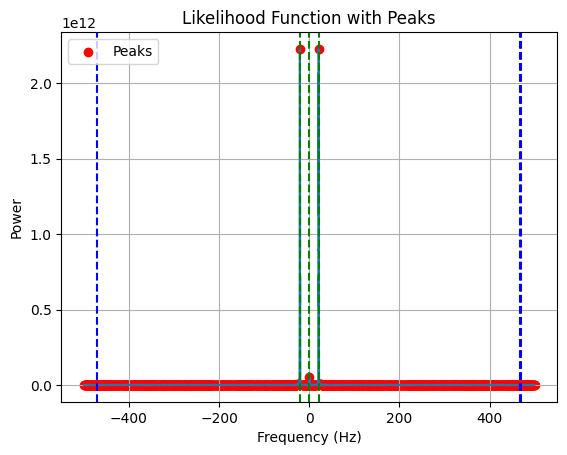

Top three peak frequencies: [-20.89698155  20.89698155   0.06110229]
Top three lowest peak frequencies: [ 466.45484541  470.54869852 -470.54869852]


In [69]:
# Example usage:
signal = df.iloc[1, 18:]  # Example signal data
sampling_rate = 1000  # Example sampling rate
speed_of_sound = 343  # Example speed of sound in m/s
top_three_peak_frequencies, top_three_lowest_peaks = ml_first_echo_detection(signal, sampling_rate, speed_of_sound)
print("Top three peak frequencies:", top_three_peak_frequencies)

print("Top three lowest peak frequencies:", top_three_lowest_peaks)

In [71]:
def freq_to_distance(frequency, speed_of_sound):
    # Convert frequency to distance using the speed of sound
    distance = (speed_of_sound / (2 * frequency)) * 100  # Convert to centimeters
    return distance

# Example usage:
speed_of_sound = 343  # Speed of sound in air at room temperature (~20°C) in meters/second

# Convert top three peak frequencies to distances
top_three_peak_distances = [freq_to_distance(freq, speed_of_sound) for freq in top_three_peak_frequencies]

# Convert top three lowest peak frequencies to distances    

top_three_lowest_distances = [freq_to_distance(freq, speed_of_sound) for freq in top_three_lowest_peaks]

print("Top three peak distances:", top_three_peak_distances)

print("Top three peak distances (in centimeters):", top_three_peak_distances)


Top three peak distances: [-820.6926900584796, 820.6926900584796, 280676.89999999997]
Top three peak distances (in centimeters): [-820.6926900584796, 820.6926900584796, 280676.89999999997]


In [83]:
def ml_first_echo_detection(signal, sampling_rate, speed_of_sound):
    # ML first echo detection algorithm
    n_samples = len(signal)
    
    # Calculate the likelihood function
    likelihood = np.abs(np.fft.fft(signal))**2
    
    # Find peaks above a certain threshold
    threshold = np.max(likelihood) * 0.1  # Adjust the threshold as needed
    peaks = argrelextrema(likelihood, np.greater, order=5)[0]  # Find local maxima
    
    # Sort the peaks in descending order of their values
    sorted_peaks = sorted(peaks, key=lambda x: likelihood[x], reverse=True)
    
    # Plot the likelihood function with all peaks
    freq = np.fft.fftfreq(n_samples, d=1/sampling_rate)
    plt.plot(freq, likelihood)
    plt.scatter(freq[peaks], likelihood[peaks], color='red', label='Peaks')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Likelihood Function with Peaks')
    plt.legend()
    plt.grid(True)
    
    # Display the top three highest peaks
    top_three_peaks = sorted_peaks[:3]
    for peak in top_three_peaks:
        plt.axvline(x=freq[peak], color='green', linestyle='--', label='Top Peak')
    
    # Display the top three lowest peaks
    top_three_lowest_peaks = sorted_peaks[-3:]
    for peak in top_three_lowest_peaks:
        plt.axvline(x=freq[peak], color='blue', linestyle='--', label='Bottom Peak')
    plt.show()
    
    # Return the top three peak frequencies and top three lowest peak frequencies
    return freq[top_three_peaks], freq[top_three_lowest_peaks]


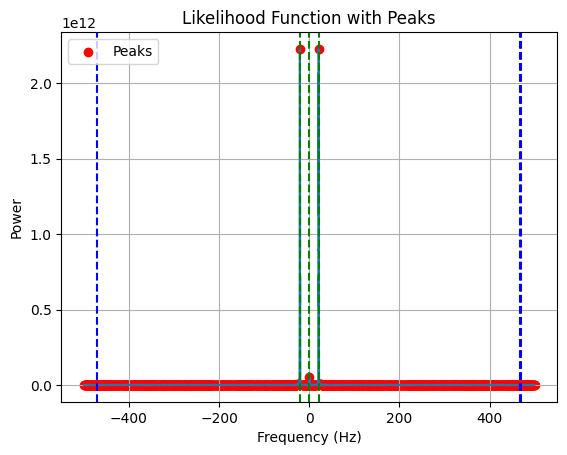

Top three peak frequencies: [-20.89698155  20.89698155   0.06110229]
Top three peak distances (in centimeters): [-820.6926900584796, 820.6926900584796, 280676.89999999997]
Top three lowest peak frequencies: [ 466.45484541  470.54869852 -470.54869852]
Top three lowest peak distances (in centimeters): [36.76668849882106, 36.44681210232437, -36.44681210232437]


In [84]:
def freq_to_distance(frequency, speed_of_sound):
    # Convert frequency to distance using the speed of sound
    distance = (speed_of_sound / (2 * frequency)) * 100  # Convert to centimeters
    return distance

# Example usage:
signal = df.iloc[1, 18:]  # Example signal data
sampling_rate = 1000  # Example sampling rate
speed_of_sound = 343  # Example speed of sound in m/s

# Detect top three peak frequencies and top three lowest peak frequencies
top_three_peak_frequencies, top_three_lowest_peak_frequencies = ml_first_echo_detection(signal, sampling_rate, speed_of_sound)

# Convert top three peak frequencies to distances
top_three_peak_distances = [freq_to_distance(freq, speed_of_sound) for freq in top_three_peak_frequencies]

# Convert top three lowest peak frequencies to distances
top_three_lowest_distances = [freq_to_distance(freq, speed_of_sound) for freq in top_three_lowest_peak_frequencies]

print("Top three peak frequencies:", top_three_peak_frequencies)
print("Top three peak distances (in centimeters):", top_three_peak_distances)

print("Top three lowest peak frequencies:", top_three_lowest_peak_frequencies)
print("Top three lowest peak distances (in centimeters):", top_three_lowest_distances)

Top three peak distances (in centimeters): [61.469534050179206, -61.469534050179206, -263.84615384615387]
Top three lowest peak distances (in centimeters): [80.51643192488262, -40.639810426540286, 40.639810426540286]


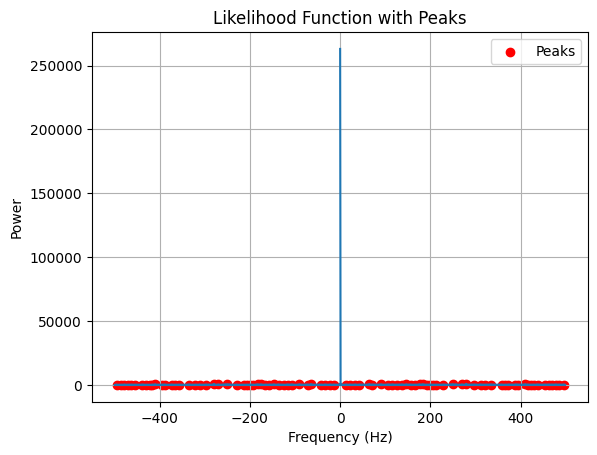

Top three peak frequencies: [ 279. -279.  -65.]
Top three peak distances (in centimeters): [61.469534050179206, -61.469534050179206, -263.84615384615387]
Top three lowest peak frequencies: [ 213. -422.  422.]
Top three lowest peak distances (in centimeters): [80.51643192488262, -40.639810426540286, 40.639810426540286]


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def ml_first_echo_detection(signal, sampling_rate, speed_of_sound):
    # ML first echo detection algorithm
    n_samples = len(signal)
    
    # Calculate the likelihood function
    likelihood = np.abs(np.fft.fft(signal))**2
    
    # Find peaks above a certain threshold
    threshold = np.max(likelihood) * 0.1  # Adjust the threshold as needed
    peaks = argrelextrema(likelihood, np.greater, order=5)[0]  # Find local maxima
    
    # Sort the peaks in descending order of their values
    sorted_peaks = sorted(peaks, key=lambda x: likelihood[x], reverse=True)
    
    # Extract the top three highest peaks
    top_three_peaks = sorted_peaks[:3]
    
    # Extract the top three lowest peaks
    top_three_lowest_peaks = sorted_peaks[-3:]
    
    # Plot the likelihood function with all peaks
    freq = np.fft.fftfreq(n_samples, d=1/sampling_rate)
    plt.plot(freq, likelihood)
    plt.scatter(freq[peaks], likelihood[peaks], color='red', label='Peaks')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Likelihood Function with Peaks')
    plt.legend()
    plt.grid(True)
    
    # Calculate distances from the data points corresponding to the peaks
    top_three_peak_distances = [freq_to_distance(freq[peak], speed_of_sound) for peak in top_three_peaks]
    top_three_lowest_distances = [freq_to_distance(freq[peak], speed_of_sound) for peak in top_three_lowest_peaks]
    
    # Print the distances
    print("Top three peak distances (in centimeters):", top_three_peak_distances)
    print("Top three lowest peak distances (in centimeters):", top_three_lowest_distances)
    
    plt.show()
    
    # Return the top three peak frequencies and top three lowest peak frequencies
    return freq[top_three_peaks], freq[top_three_lowest_peaks]

def freq_to_distance(frequency, speed_of_sound):
    # Convert frequency to distance using the speed of sound
    distance = (speed_of_sound / (2 * frequency)) * 100  # Convert to centimeters
    return distance

# Example usage:
# Load your signal data here
# signal = df.iloc[1, 18:]  # Example signal data
signal = np.random.rand(1000)  # Example random signal data
sampling_rate = 1000  # Example sampling rate
speed_of_sound = 343  # Example speed of sound in m/s

# Detect top three peak frequencies and top three lowest peak frequencies
top_three_peak_frequencies, top_three_lowest_peak_frequencies = ml_first_echo_detection(signal, sampling_rate, speed_of_sound)

# Convert top three peak frequencies to distances
top_three_peak_distances = [freq_to_distance(freq, speed_of_sound) for freq in top_three_peak_frequencies]

# Convert top three lowest peak frequencies to distances
top_three_lowest_distances = [freq_to_distance(freq, speed_of_sound) for freq in top_three_lowest_peak_frequencies]

print("Top three peak frequencies:", top_three_peak_frequencies)
print("Top three peak distances (in centimeters):", top_three_peak_distances)

print("Top three lowest peak frequencies:", top_three_lowest_peak_frequencies)
print("Top three lowest peak distances (in centimeters):", top_three_lowest_distances)


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def ml_first_echo_detection(signal, sampling_rate, speed_of_sound):
    # ML first echo detection algorithm
    n_samples = len(signal)
    
    # Calculate the likelihood function
    likelihood = np.abs(np.fft.fft(signal))**2
    
    # Find peaks above a certain threshold
    threshold = np.max(likelihood) * 0.1  # Adjust the threshold as needed
    peaks = argrelextrema(likelihood, np.greater, order=5)[0]  # Find local maxima
    
    # Sort the peaks in descending order of their values
    sorted_peaks = sorted(peaks, key=lambda x: likelihood[x], reverse=True)
    
    # Extract the top three highest peaks
    top_three_peaks = sorted_peaks[:3]
    
    # Extract the top three lowest peaks
    top_three_lowest_peaks = sorted_peaks[-3:]
    
    # Plot the likelihood function with all peaks
    freq = np.fft.fftfreq(n_samples, d=1/sampling_rate)
    plt.plot(freq, likelihood)
    plt.scatter(freq[peaks], likelihood[peaks], color='red', label='Peaks')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Likelihood Function with Peaks')
    plt.legend()
    plt.grid(True)
    
    # Calculate distances from the data points corresponding to the peaks
    top_three_peak_distances = [freq_to_distance(freq[peak], speed_of_sound) for peak in top_three_peaks]
    top_three_lowest_distances = [freq_to_distance(freq[peak], speed_of_sound) for peak in top_three_lowest_peaks]
    
    # Print the distances
    print("Top three peak distances (in centimeters):", top_three_peak_distances)
    print("Top three lowest peak distances (in centimeters):", top_three_lowest_distances)
    
    plt.show()
    
    # Return the top three peak frequencies and top three lowest peak frequencies
    return freq[top_three_peaks], freq[top_three_lowest_peaks]

def freq_to_distance(frequency, speed_of_sound):
    # Convert frequency to distance using the speed of sound
    distance = (speed_of_sound / (2 * frequency)) * 100  # Convert to centimeters
    return distance

# Example usage:
# Load your signal data here
# signal = df.iloc[1, 18:]  # Example signal data
signal = np.random.rand(1000)  # Example random signal data
sampling_rate = 1000  # Example sampling rate
speed_of_sound = 343  # Example speed of sound in m/s

# Detect top three peak frequencies and top three lowest peak frequencies
top_three_peak_frequencies, top_three_lowest_peak_frequencies = ml_first_echo_detection(signal, sampling_rate, speed_of_sound)

# Convert top three peak frequencies to distances
top_three_peak_distances = [freq_to_distance(freq, speed_of_sound) for freq in top_three_peak_frequencies]

# Convert top three lowest peak frequencies to distances
top_three_lowest_distances = [freq_to_distance(freq, speed_of_sound) for freq in top_three_lowest_peak_frequencies]

print("Top three peak frequencies:", top_three_peak_frequencies)
print("Top three peak distances (in centimeters):", top_three_peak_distances)

print("Top three lowest peak frequencies:", top_three_lowest_peak_frequencies)
print("Top three lowest peak distances (in centimeters):", top_three_lowest_distances)
